**линейный классификатор**

правило Розенблатта  

Евгений Борисов borisov.e@solarl.ru

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing   import MinMaxScaler

---

In [2]:
# загружаем даные
data = [
    np.loadtxt('../data/200_2b/points_1.txt'),
    np.loadtxt('../data/200_2b/points_2.txt')
]

In [3]:
# собираем вместе
X = np.vstack(data)

In [4]:
# метки классов
y = [ [i]*data[i].shape[0] for i in range(len(data)) ]
y = np.asarray(sum(y,[]))
#y = y*2-1

In [5]:
X.shape, y.shape

((200, 2), (200,))

In [6]:
%xdel data

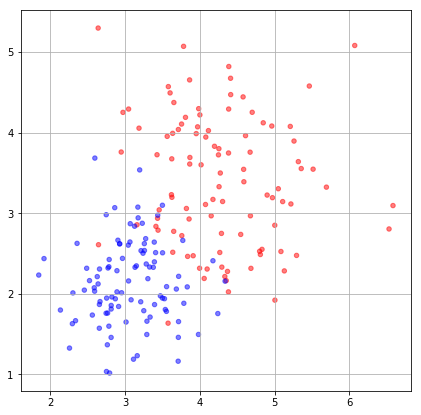

In [7]:
plt.figure(figsize=(7,7))
plt.scatter( x=X[:,0], 
             y=X[:,1], 
             c=[ 'b' if(j>0) else 'r' for j in y ], 
             s=20,
             alpha=0.5 )
plt.grid()
plt.show()

---

In [8]:
# биннаризация X
n=50
b = np.vstack([ np.linspace(X[:,j].min()-1,X[:,j].max()+1,n) for j in range(X.shape[1]) ])

Xp = np.hstack([
    np.hstack([ ( (b[j,i]<X[:,j])&(X[:,j]<b[j,i+1]) ).astype(int).reshape(X.shape[0],1) 
    for i in range(b.shape[1]-1) ])
    for j in range(X.shape[1])
])

Xp.shape

(200, 98)

---

In [9]:
# from time import time
# def get_seed(): t = time() ; return int(((t%1)/(t//1))*1e11)
# np.random.seed(get_seed())

In [10]:
# инициализация параметров
W = np.random.normal(loc=0.0, scale=0.1, size=Xp.shape[1])
W 

array([ 0.06779605,  0.06460253, -0.1234268 ,  0.19730215,  0.05859631,
        0.04240631,  0.14198319,  0.07104515,  0.11413085,  0.07182698,
        0.0039017 , -0.13354186,  0.05043398,  0.0152158 ,  0.0645592 ,
       -0.06355994, -0.12824411, -0.16222558,  0.11990698, -0.01440988,
       -0.0469913 , -0.02667839,  0.22836912, -0.19310316,  0.07682502,
       -0.05571658, -0.11491379, -0.09683581,  0.02187208,  0.07231332,
        0.09551598,  0.07480032, -0.04820276, -0.0501245 , -0.22074412,
        0.19082226,  0.16743944,  0.01110133, -0.03445954,  0.05389933,
       -0.29961297,  0.19360969, -0.15041074,  0.20538995,  0.06884027,
       -0.01851201,  0.09988744, -0.21358229,  0.05028256,  0.0257175 ,
        0.04937291, -0.09899141, -0.14366471,  0.20341585, -0.05646343,
       -0.25806768,  0.18218719, -0.03887966, -0.02072421,  0.13140257,
       -0.021113  ,  0.05984985, -0.11035672, -0.04381823,  0.04218795,
       -0.02507177, -0.0032908 , -0.10685191, -0.08938505,  0.12

In [11]:
def loss(x,w,y): return -x.dot(w)*y    

In [12]:
MAX_ITER = 20 # максимальное число циклов обучения

# ERROR_BOUND = -Xp.shape[0]*0.99 # порог ошибки (количество ошибок)
ERROR_BOUND = -3.1

a=0.7 # скорость обучения
l = 0.5 # темп "забывания"

er_hist = [] # история ошибки

In [13]:
q = loss(Xp,W,y).sum()
er_hist.append( q )

In [14]:
# метод стохастического градиентного спуска (SGD)
stop=False
for i in range(MAX_ITER):
    if stop: break
    for j in np.random.permutation(Xp.shape[0]):
        
        if er_hist[-1] < ERROR_BOUND: # проверяем достижение порога
            print( 'error bound on epoch %i step %i: %f'%(i,j,er_hist[-1]) )
            stop=True
            break

        xj,yj = Xp[j,:],y[j]
        
        r = (xj.dot(W)>0.5).astype(int) # выход
        W = W - a * xj.T.dot(r-y[j])
        
        # значение ф-ции потери
        qj = loss(xj,W,yj)
        q = l*qj +(1-l)*q
        er_hist.append( q )  
        

error bound on epoch 9 step 120: -3.188981


In [15]:
print(W)
print(len(er_hist),er_hist[-1],min(er_hist))

[ 0.06779605  0.06460253 -0.1234268   0.19730215  0.05859631  0.04240631
  0.14198319  0.77104515  0.11413085  0.07182698  0.7039017   0.56645814
  1.45043398  0.7152158   1.4645592   0.63644006  1.27175589  1.93777442
  0.11990698 -0.01440988 -0.0469913  -0.02667839 -1.17163088 -1.59310316
 -0.62317498 -1.45571658 -0.11491379 -0.79683581 -0.67812792  0.07231332
 -0.60448402 -0.62519968 -0.74820276 -0.0501245  -0.22074412  0.19082226
  0.16743944  0.01110133 -0.03445954  0.05389933 -0.29961297  0.19360969
 -0.15041074  0.20538995  0.06884027 -0.01851201  0.09988744 -0.21358229
  0.05028256  0.0257175   0.04937291 -0.09899141 -0.14366471  0.20341585
 -0.05646343 -0.25806768  0.88218719  0.66112034  0.67927579  0.83140257
  2.078887    0.05984985  1.28964328  0.65618177  1.44218795  2.07492823
  0.6967092   1.29314809 -0.08938505  0.82901002 -1.31754635 -0.72420754
 -0.06249357 -0.05431603 -0.76039492  0.09612511 -0.68938084 -0.73794213
 -0.67042353 -0.83024336 -1.5052647  -0.62126073 -1

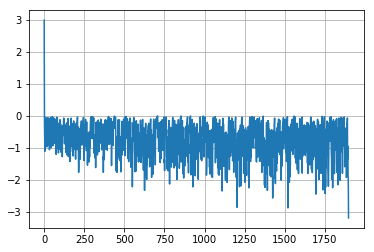

In [16]:
plt.plot(range(len(er_hist)),er_hist)
plt.grid()
plt.show()

---

In [17]:
o = Xp.dot(W)

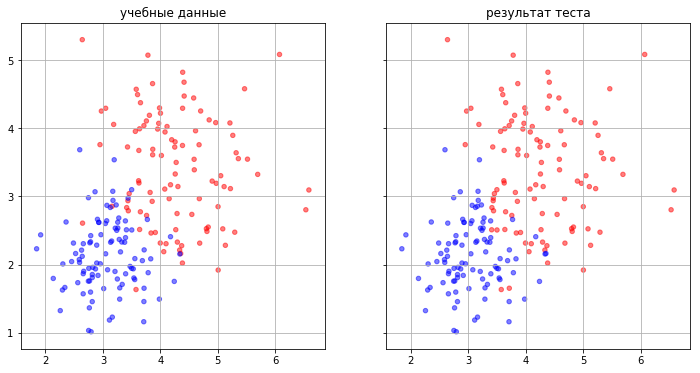

In [18]:
f, axarr = plt.subplots(1,2, sharex=True, sharey=True,figsize=(12,6),)
    
axarr[0].set_title('учебные данные')
axarr[0].scatter( x=X[:,0], 
             y=X[:,1], 
             c=[ 'b' if(j>0) else 'r' for j in y ], 
             s=20,
             alpha=0.5 )
axarr[0].grid()

axarr[1].set_title('результат теста')
axarr[1].scatter( x=X[:,0], 
             y=X[:,1], 
             c=[ 'b' if(j>0.5) else 'r' for j in o ], 
             s=20,
             alpha=0.5 )
axarr[1].grid()

plt.show()
